- Author:Akashnil Roy

## Importing the required Packages

In [0]:
import PyPDF2
import re,os
import pandas as pd
import numpy as np
from tika import parser
from pprint import pprint

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Initializing the path to fetch the speech pdf files

In [0]:
speech_path = '/content/drive/My Drive/TXTA/Obama speeches pdf/'

In [0]:
files_obama = os.listdir(speech_path)

In [8]:
files_obama

['01 Dec 2008_Barack Obama - Security Team Announcement.pdf',
 '01 Feb 2010_Barack Obama - 2010 Budget to Congress.pdf',
 '01 Dec 2009_Barack Obama - Afghanistan War Troop Surge.pdf',
 '01 Aug 2014_Barack Obama - Presser on the Economy and Foreign Policy.pdf',
 '01 Jun 2015_Barack Obama - YSEALI Fellows.pdf',
 '01 Dec 2015_Barack Obama - Paris Press Conference 2015.pdf',
 '01 Apr 2016_Barack Obama - Nuclear Security Summit Presser.pdf',
 '01 Jul 2010_Barack Obama - Comprehensive Immigration Reform.pdf',
 '01 Jan 2016_Barack Obama - Weekly Address 01-01-16.pdf',
 '01 May 2010_Barack Obama - Michigan University Commencement.pdf',
 '04 Feb 2016_Barack Obama - Golden State Warriors.pdf',
 '01 May 2011_Barack Obama - Osama bin Laden Death.pdf',
 '01 Oct 2008_Barack Obama - Senate Floor Speech on Wall Street Bailout Bill.pdf',
 '02 Apr 2015_Barack Obama - Iran Nuclear Agreement.pdf',
 '01 Oct 2015_Barack Obama - Umpqua Community College Shootings.pdf',
 '02 Apr 2009_Barack Obama - G20 Remark

### Extracting the content from the speeches
Then we segregated the speeches into a DataFrame with three columns as heading,date,content

In [12]:
speech = {'date':[],'heading':[],'content':[]}
for file in files_obama:
    print(file)
    f = parser.from_file(speech_path+file)['content']
    f = re.sub("\\n","",f)
    f = re.sub("AAmmeerriiccaannRRhheettoorriicc..ccoomm   AmericanRhetoric.com","",f)
    f = re.sub("(.*audio)","",f)
    f = re.sub("Page ..","",f)
    n = file
    d = re.findall("(.+?)_",n)[0]
    h = re.findall(" .*[\_](.+?)pdf",n)
#     h = re.sub("\-","",h)
    h = re.sub("\.pdf","",h[0])
    speech['content'].append(f)
    speech['date'].append(d)
    speech['heading'].append(h)

01 Dec 2008_Barack Obama - Security Team Announcement.pdf
01 Feb 2010_Barack Obama - 2010 Budget to Congress.pdf
01 Dec 2009_Barack Obama - Afghanistan War Troop Surge.pdf
01 Aug 2014_Barack Obama - Presser on the Economy and Foreign Policy.pdf
01 Jun 2015_Barack Obama - YSEALI Fellows.pdf
01 Dec 2015_Barack Obama - Paris Press Conference 2015.pdf
01 Apr 2016_Barack Obama - Nuclear Security Summit Presser.pdf
01 Jul 2010_Barack Obama - Comprehensive Immigration Reform.pdf
01 Jan 2016_Barack Obama - Weekly Address 01-01-16.pdf
01 May 2010_Barack Obama - Michigan University Commencement.pdf
04 Feb 2016_Barack Obama - Golden State Warriors.pdf
01 May 2011_Barack Obama - Osama bin Laden Death.pdf
01 Oct 2008_Barack Obama - Senate Floor Speech on Wall Street Bailout Bill.pdf
02 Apr 2015_Barack Obama - Iran Nuclear Agreement.pdf
01 Oct 2015_Barack Obama - Umpqua Community College Shootings.pdf
02 Apr 2009_Barack Obama - G20 Remarks and Presser 2009.pdf
02 Aug 2011_Barack Obama - Debt Comprom

Putting the segregation done above in *speeches* to a DataFrame data_speeches

In [0]:
data_speeches = pd.DataFrame(speech)

In [0]:
data_speeches.head()
ds=data_speeches.copy()

In [43]:
data_speeches['content']

0       Good morning, everybody. I hope you all had a...
1       Good morning, everybody. This morning, I sent...
2       Thank you. Please be seated. Good evening. To...
3       Good afternoon, everybody.  Happy Friday.  I ...
4       Thank you. Thank you. Everybody, please have ...
                             ...                        
426     President Hollande, Mr. Secretary General, fe...
427     Good evening.  Tonight, I’d like to talk to y...
428     Zvia, Yoni, Chemi and generations of the Pere...
429     For more than a year now, across thousands of...
430     I -- I've got a few introductions that I want...
Name: content, Length: 431, dtype: object

In [0]:
l=len(data_speeches)

In [45]:
l

431

## Implementing LDA(Latent Dirichlet Allocation) on the speeches of President Barack Obama

- I tokenized the speeches section by converting them into tokens
- Then removed numbers but didnot remove words that contain numbers
- I also removed words that were of single character

In [0]:
# Tokenization of the documents.
from nltk.tokenize import RegexpTokenizer

# Splitting the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(l):
    data_speeches['content'][idx] = data_speeches['content'][idx].lower()  # Convert to lowercase.
    data_speeches['content'][idx] = tokenizer.tokenize(data_speeches['content'][idx])  # Split into words.

# Removing numbers, but not words that contain numbers.
docs = [[token for token in doc if not token.isnumeric()] for doc in data_speeches['content']]

#  Remove words that are only one character.
docs = [[token for token in doc if len(token) > 1] for doc in data_speeches['content']]

In [47]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

- Performing the Lemmatization of the speeches using the *WordNetLemmatizer*

In [0]:
# Lemmatize the documents.
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in data_speeches['content']]

- Computing Bigrams based on phrases used in the subsequent speeches

In [49]:
# Compute bigrams.
from gensim.models import Phrases


bigram = Phrases(data_speeches['content'], min_count=20)
for idx in range(l):
    for token in bigram[data_speeches['content'][idx]]:
        if '_' in token:
            data_speeches['content'][idx].append(token)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


- Removing the rare and commmon words
- Created a dictionary of documents
- Filtered out words which occur in less than 20 documents or in more than 50% documents

In [0]:
# Removing rare and common tokens.
from gensim.corpora import Dictionary

# Creating a dictionary representation of the documents.
dictionary = Dictionary(data_speeches['content'])

# Filtering out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)

- Building the corpus

In [0]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in data_speeches['content']]

In [52]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 4134
Number of documents: 431


Training the LDA Model

In [56]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

model.save('lda.model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [54]:
top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -0.8496.
[([(0.014545324, 'obama'),
   (0.01398415, 'president_obama'),
   (0.013930806, 'question'),
   (0.0073002605, 'mr'),
   (0.005245854, 'mr_president'),
   (0.0048361537, 'folks'),
   (0.004032278, 'issues'),
   (0.003939656, 'getting'),
   (0.0037898684, 'republicans'),
   (0.0037629441, 'actually'),
   (0.0036635508, 'really'),
   (0.0035537453, 'problem'),
   (0.00340731, 'issue'),
   (0.003331542, 'insurance'),
   (0.0032692861, 'process'),
   (0.003046827, 'right_now'),
   (0.002926961, 'terms'),
   (0.002856928, 'whole'),
   (0.0028479681, 'in_terms'),
   (0.0027910888, 'health_care')],
  -0.5496615585568022),
 ([(0.007522517, 'insurance'),
   (0.00664762, 'she'),
   (0.005362224, 'health_care'),
   (0.004678319, 'education'),
   (0.0041547, 'school'),
   (0.0038227588, 'question'),
   (0.0038115361, 'her'),
   (0.003775743, 'young_people'),
   (0.0035970928, 'really'),
   (0.0034967645, 'getting'),
   (0.0034320222, 'big'),
   (0.0031624075, 'hea

In [55]:
!pip install pyldavis

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 45.9MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=6261868f788eb5c6232ac8987e28e007fba5935fe6e17ed51f2064b7cc8f1ba5
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=58349f4c474e108c5184a36b3a6ef0c74226160ed19bcc3d67d98635e7306eee
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyldavis funcy


In [59]:
import gensim

dictionary = dictionary
corpus = corpus
lda = gensim.models.ldamodel.LdaModel.load('lda.model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [60]:
lda.show_topics()

[(0,
  '0.016*"iran" + 0.012*"nuclear" + 0.011*"military" + 0.009*"iraq" + 0.008*"veterans" + 0.007*"afghanistan" + 0.007*"troops" + 0.006*"deal" + 0.006*"forces" + 0.005*"international"'),
 (1,
  '0.009*"com" + 0.009*"americanrhetoric" + 0.009*"americanrhetoric_com" + 0.008*"copyright" + 0.007*"reserved" + 0.007*"all_rights" + 0.007*"property" + 0.006*"financial" + 0.006*"education" + 0.005*"copyright_2012"'),
 (2,
  '0.012*"nations" + 0.007*"peace" + 0.006*"human" + 0.005*"africa" + 0.004*"freedom" + 0.004*"democracy" + 0.004*"global" + 0.004*"nuclear" + 0.004*"europe" + 0.004*"americanrhetoric"'),
 (3,
  '0.018*"israel" + 0.010*"mr" + 0.007*"russia" + 0.007*"ukraine" + 0.006*"obama" + 0.006*"peace" + 0.006*"president_obama" + 0.005*"nato" + 0.005*"region" + 0.004*"military"'),
 (4,
  '0.010*"governor" + 0.008*"energy" + 0.008*"obama" + 0.007*"president_obama" + 0.006*"question" + 0.006*"oil" + 0.004*"businesses" + 0.004*"companies" + 0.004*"big" + 0.003*"percent"'),
 (5,
  '0.010*"s

In [0]:
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [63]:
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.011756 -0.082786       1        1  15.745434
9     -0.085502  0.099123       2        1  15.103887
6     -0.131440 -0.032425       3        1  11.562632
2      0.099150 -0.087811       4        1  11.382187
8      0.036895  0.058951       5        1   9.729138
4     -0.084361  0.020817       6        1   9.334258
0      0.110343  0.001661       7        1   8.343592
7      0.075238  0.068427       8        1   8.095129
1     -0.082862 -0.078389       9        1   7.266168
3      0.050784  0.032433      10        1   3.437575, topic_info=                 Term         Freq        Total Category  logprob  loglift
210              iran   832.000000   832.000000  Default  30.0000  30.0000
2424             isil   607.000000   607.000000  Default  29.0000  29.0000
1684  president_obama  1492.000000  1492.000000  Default  28.0000  28.0000
213            israel   441.000000   441.000000  Default  27.0000  27.0000
1645            obama  1665.000000  1665.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
1326                u    50.933674   682.805115  Topic10  -5.7294   0.7747
1704         question    54.432213  1602.442993  Topic10  -5.6630  -0.0119
208     international    46.233353   742.507874  Topic10  -5.8263   0.5941
242            middle    45.137482   661.612427  Topic10  -5.8502   0.6854
1327              u_s    44.004360   590.941467  Topic10  -5.8757   0.7730

[653 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
444       1  0.022064          2010
444       2  0.110318          2010
444       3  0.022064          2010
444       4  0.176508          2010
444       5  0.022064          2010
...     ...       ...           ...
769       6  0.240671  young_people
769       7  0.014262  young_people
769       8  0.021393  young_people
769       9  0.033872  young_people
769      10  0.016045  young_people

[4290 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 10, 7, 3, 9, 5, 1, 8, 2, 4])

## Implementing the Vader Sentiment Analysis
To gauge the sentiment of the speeches given by Barack Obama

In [64]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 2.8MB/s 


In [65]:
ds

,date,heading,content
0,01 Dec 2008,Barack Obama - Security Team Announcement.,"Good morning, everybody. I hope you all had a..."
1,01 Feb 2010,Barack Obama - 2010 Budget to Congress.,"Good morning, everybody. This morning, I sent..."
2,01 Dec 2009,Barack Obama - Afghanistan War Troop Surge.,Thank you. Please be seated. Good evening. To...
3,01 Aug 2014,Barack Obama - Presser on the Economy and Fore...,"Good afternoon, everybody. Happy Friday. I ..."
4,01 Jun 2015,Barack Obama - YSEALI Fellows.,"Thank you. Thank you. Everybody, please have ..."
...,...,...,...
426,30 Nov 2015,Barack Obama - COP21.,"President Hollande, Mr. Secretary General, fe..."
427,31 Aug 2010,Barack Obama - Iraqi Freedom End.,"Good evening. Tonight, I’d like to talk to y..."
428,30 Sep 2016,Barack Obama - Shimon Peres Memorial.,"Zvia, Yoni, Chemi and generations of the Pere..."
429,9 Jun 2016,Barack Obama - Hillary Clinton Endorsement.,"For more than a year now, across thousands of..."


In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser=SentimentIntensityAnalyzer()

- I ran the vader sentiment analyser and it assigned negative,neutral,positive and compund scores for each speech.
- Based on this we get to undestand whether the speeches spoken were positive,negative or neutral in nature

In [69]:
scores=[]
for i in range(ds.shape[0]):
    score= analyser.polarity_scores(ds['content'][i])
    print(score)
    scores.append(score)

{'neg': 0.06, 'neu': 0.812, 'pos': 0.128, 'compound': 0.9977}
{'neg': 0.079, 'neu': 0.77, 'pos': 0.151, 'compound': 0.9992}
{'neg': 0.112, 'neu': 0.744, 'pos': 0.144, 'compound': 0.9991}
{'neg': 0.079, 'neu': 0.786, 'pos': 0.135, 'compound': 0.9999}
{'neg': 0.043, 'neu': 0.767, 'pos': 0.19, 'compound': 1.0}
{'neg': 0.062, 'neu': 0.788, 'pos': 0.151, 'compound': 1.0}
{'neg': 0.078, 'neu': 0.77, 'pos': 0.152, 'compound': 0.9999}
{'neg': 0.095, 'neu': 0.767, 'pos': 0.138, 'compound': 0.9996}
{'neg': 0.134, 'neu': 0.755, 'pos': 0.111, 'compound': -0.9793}
{'neg': 0.078, 'neu': 0.786, 'pos': 0.135, 'compound': 0.9997}
{'neg': 0.026, 'neu': 0.756, 'pos': 0.218, 'compound': 0.9999}
{'neg': 0.1, 'neu': 0.761, 'pos': 0.139, 'compound': 0.9933}
{'neg': 0.115, 'neu': 0.748, 'pos': 0.137, 'compound': 0.9935}
{'neg': 0.099, 'neu': 0.742, 'pos': 0.159, 'compound': 0.9995}
{'neg': 0.136, 'neu': 0.767, 'pos': 0.097, 'compound': -0.9974}
{'neg': 0.066, 'neu': 0.778, 'pos': 0.156, 'compound': 1.0}
{'neg

In [0]:
# Making a copy of the speeeches dataframe 
ds1=ds.copy()
ds2=ds.copy()

In [72]:
new_scores =pd.DataFrame(scores)
new_scores.shape
ls=[ds,new_scores] 
df= pd.concat(ls, axis=1)
df

,date,heading,content,neg,neu,pos,compound
0,01 Dec 2008,Barack Obama - Security Team Announcement.,"Good morning, everybody. I hope you all had a...",0.060,0.812,0.128,0.9977
1,01 Feb 2010,Barack Obama - 2010 Budget to Congress.,"Good morning, everybody. This morning, I sent...",0.079,0.770,0.151,0.9992
2,01 Dec 2009,Barack Obama - Afghanistan War Troop Surge.,Thank you. Please be seated. Good evening. To...,0.112,0.744,0.144,0.9991
3,01 Aug 2014,Barack Obama - Presser on the Economy and Fore...,"Good afternoon, everybody. Happy Friday. I ...",0.079,0.786,0.135,0.9999
4,01 Jun 2015,Barack Obama - YSEALI Fellows.,"Thank you. Thank you. Everybody, please have ...",0.043,0.767,0.190,1.0000
...,...,...,...,...,...,...,...
426,30 Nov 2015,Barack Obama - COP21.,"President Hollande, Mr. Secretary General, fe...",0.072,0.738,0.190,0.9998
427,31 Aug 2010,Barack Obama - Iraqi Freedom End.,"Good evening. Tonight, I’d like to talk to y...",0.127,0.725,0.148,0.9929
428,30 Sep 2016,Barack Obama - Shimon Peres Memorial.,"Zvia, Yoni, Chemi and generations of the Pere...",0.087,0.741,0.172,0.9997
429,9 Jun 2016,Barack Obama - Hillary Clinton Endorsement.,"For more than a year now, across thousands of...",0.022,0.762,0.216,0.9990


- Trying to understand rather find a pattern as in when President Obama exudes what kind of sentiment through his speeches

In [86]:
compound=df['compound'].mean()
if (compound>0.05):
  print("Positive Sentiment")
  print(compound)
elif (compound>-0.05 & compund<0.05):
  print("Neutral Sentiment")
  print(compound)
else:
  print("Negative Sentiment")
  print(compound)    

Positive Sentiment
0.8647470997679821


So in general we can conclude that President Obama's speeches were mostly Positive in nature.

In [73]:
df['date']= pd.to_datetime(df['date'])
df[['year','month','day']] = df.date.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))
df.head()

,date,heading,content,neg,neu,pos,compound,year,month,day
0,2008-12-01,Barack Obama - Security Team Announcement.,"Good morning, everybody. I hope you all had a...",0.060,0.812,0.128,0.9977,2008,12,01
1,2010-02-01,Barack Obama - 2010 Budget to Congress.,"Good morning, everybody. This morning, I sent...",0.079,0.770,0.151,0.9992,2010,02,01
2,2009-12-01,Barack Obama - Afghanistan War Troop Surge.,Thank you. Please be seated. Good evening. To...,0.112,0.744,0.144,0.9991,2009,12,01
3,2014-08-01,Barack Obama - Presser on the Economy and Fore...,"Good afternoon, everybody. Happy Friday. I ...",0.079,0.786,0.135,0.9999,2014,08,01
4,2015-06-01,Barack Obama - YSEALI Fellows.,"Thank you. Thank you. Everybody, please have ...",0.043,0.767,0.190,1.0000,2015,06,01


In [74]:
df["year"].unique()

array(['2008', '2010', '2009', '2014', '2015', '2016', '2011', '2013',
       '2012', '2007', '2005', '2017', '2006', '2004'], dtype=object)

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


- Visualization of the Sentiment Analysis that we condeucted above using the Vader Sentiment Analyzer

In [78]:
plt.figure(figsize=[25,8],dpi=600)
plt.xticks(rotation=90)
sns.lineplot(x="year",y="pos",data=df,marker="+",label="positive")
sns.lineplot(x="year",y="neg",data=df,marker=">",label="negative")
sns.lineplot(x="year",y="neu",data=df,marker="o",label="neutral")
plt.xlabel('Year')
plt.ylabel('Sentiment Scores of Speeches')
plt.legend()
plt.title("Sentiment of the Speeches given by President Obama over the Years")

Text(0.5, 1.0, 'Sentiment of the Speeches given by President Obama over the Years')

## Creating the wordcloud

In [79]:
# Load the regular expression library
import re
# Remove punctuation
ds1['content'] = ds1['content'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
ds1['content'] = ds1['content'].map(lambda x: x.lower())
# Print out the first rows of papers
ds1['content'].head()

<input>:3: DeprecationWarning: invalid escape sequence \.
<input>:3: DeprecationWarning: invalid escape sequence \.
<input>:3: DeprecationWarning: invalid escape sequence \.
<input>:3: DeprecationWarning: invalid escape sequence \.
<input>:3: DeprecationWarning: invalid escape sequence \.
<input>:3: DeprecationWarning: invalid escape sequence \.
<input>:3: DeprecationWarning: invalid escape sequence \.
<input>:3: DeprecationWarning: invalid escape sequence \.
<input>:3: DeprecationWarning: invalid escape sequence \.
<input>:3: DeprecationWarning: invalid escape sequence \.
<input>:3: DeprecationWarning: invalid escape sequence \.
<input>:3: DeprecationWarning: invalid escape sequence \.
<input>:3: DeprecationWarning: invalid escape sequence \.
<input>:3: DeprecationWarning: invalid escape sequence \.
<input>:3: DeprecationWarning: invalid escape sequence \.
<ipython-input-79-c5577d743699>:3: DeprecationWarning: invalid escape sequence \.
  ds1['content'] = ds1['content'].map(lambda x: 

0     good morning everybody i hope you all had a w...
1     good morning everybody this morning i sent a ...
2     thank you please be seated good evening to th...
3     good afternoon everybody  happy friday  i tho...
4     thank you thank you everybody please have a s...
Name: content, dtype: object

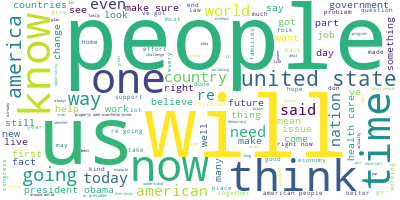

In [80]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(ds1['content'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## Trying to find out the most common words spoken by President Obama

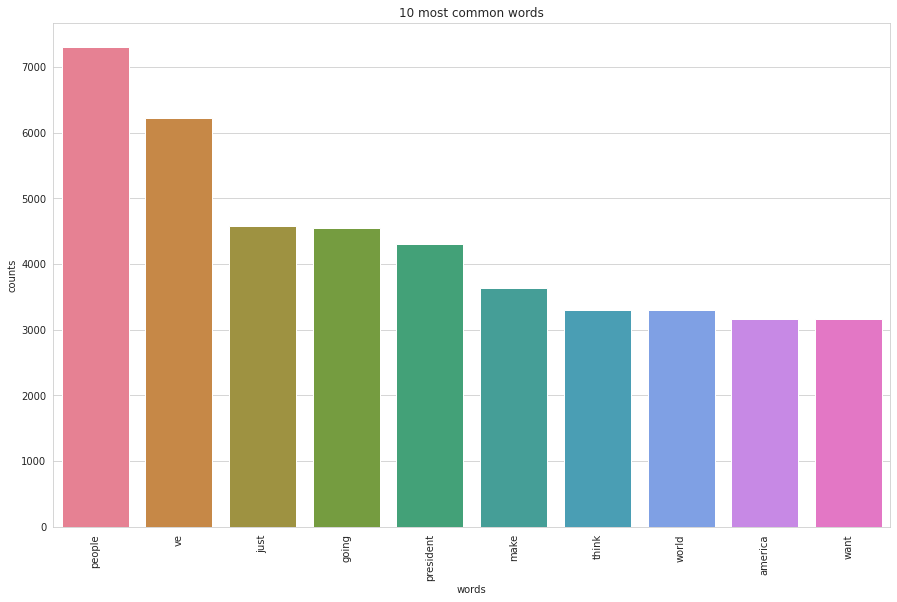

In [81]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(ds1['content'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

So the top 10 most commmon words used by President Obama in his Speeches are :

    - people
    - ve
    - just
    - going
    - president
    - make
    - think
    - world
    - america
    - want

What we can observe is that the word *people* has been uttered by President Obama the most.